In [40]:
from math import pi

class BipolarCircuit:
    def __add__(self, other):
        if isinstance(other, BipolarCircuit):
            return Serial(self, other)
        return NotImplemented

    def __or__(self, other):
        if isinstance(other, BipolarCircuit):
            return Parallel(self, other)
        return NotImplemented
    
    def simplify(self):
        return self

    
class Combination(BipolarCircuit):
    def __init__(self, *args):
        self.list_of_circuits = args

    def __repr__(self):
        s =', '.join([repr(circ) for circ in self.list_of_circuits])
        return f'{self.__class__.__name__}({s})'
    
    def simplify(self):
        out = []
        main_type = type(self)
        for circuit in self.list_of_circuits:
            circuit = circuit.simplify()
            if isinstance(circuit, main_type):
                out.extend(circuit.list_of_circuits)
            else:
                out.append(circuit)
        return main_type(*out)
        
class Serial(Combination):
    def impedance(self, freq):
        l = [circ.impedance(freq) for circ in self.list_of_circuits]
        return sum(l)
    
class Parallel(Combination):
    def impedance(self, freq):
        l = [1/circ.impedance(freq) for circ in self.list_of_circuits]
        return 1/sum(l)

class Device(BipolarCircuit):
    def __init__(self, value):
        self.value = value

    def __repr__(self):
        return f'{self.__class__.__name__}({self.value})'
        
        
class Resistor(Device):
    def impedance(self, freq):
        return self.value
    
class Capacitor(Device):
    def impedance(self, freq):
        return 1/(1J*self.value*freq*2*pi)

class Inductor(Device):
    def impedance(self, freq):
        return 1J*self.value*freq*2*pi
        
# idem for capacitor and inductor

In [41]:
# Create the Resistor class
# Then the Capacitor and Inductor
# This should work

R1 = Resistor(10)
R1 # => Resistor(10)

Resistor(10)

In [42]:
isinstance(R1, BipolarCircuit)

True

In [43]:
my_circuit = Serial(Parallel(Resistor(10),Capacitor(1E-5),Inductor(15E-6)),
                Resistor(5))
my_circuit = (Resistor(10)|Capacitor(1E-5)|Inductor(15E-6))+Resistor(5)

my_circuit.simplify()

Serial(Parallel(Resistor(10), Capacitor(1e-05), Inductor(1.5e-05)), Resistor(5))

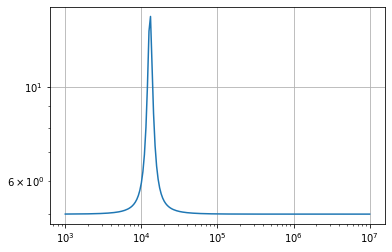

In [25]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import figure

fig = figure()
ax = fig.subplots(1, 1)


Tfreq = np.logspace(3, 7, 201)
ax.loglog(Tfreq, np.abs(my_circuit.impedance(Tfreq)))
ax.grid()